In [1]:
# https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,20

In [2]:
df=pd.read_csv(r'/home/ashlee/jupyter_notebook/stock_market_prediction/stock_data.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.shape

(1235, 7)

In [4]:
# check if my data is complete  # null or NAN -- gets true 
df.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1235 non-null   float64
 1   High                  1235 non-null   float64
 2   Low                   1235 non-null   float64
 3   Last                  1235 non-null   float64
 4   Close                 1235 non-null   float64
 5   Total Trade Quantity  1235 non-null   float64
 6   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7)
memory usage: 77.2 KB


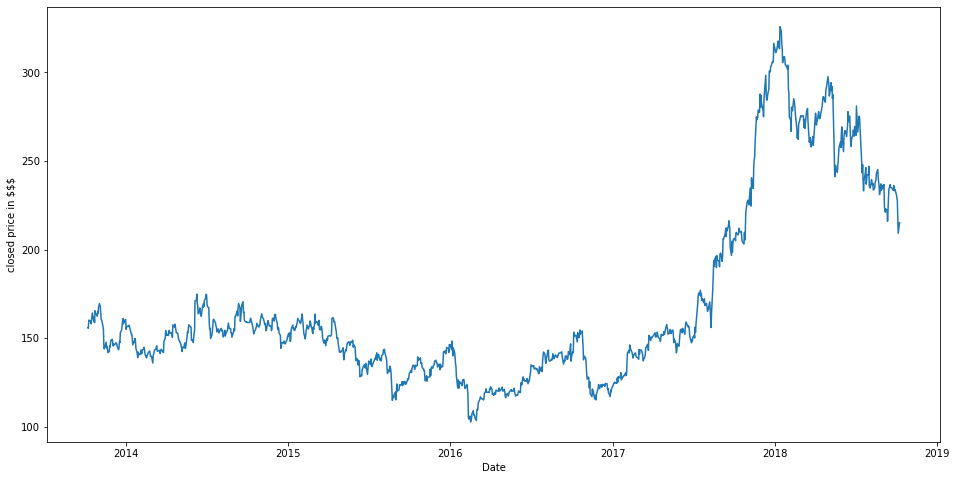

In [6]:
# The profit or loss calculation is usually determined by the closing price of a stock
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.ylabel('closed price in $$$')
plt.xlabel('Date')
plt.savefig('Closedata.png')


In [7]:
pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /home/ashlee/.local/lib/python3.8/site-packages (0.12.7a17)
Note: you may need to restart the kernel to use updated packages.


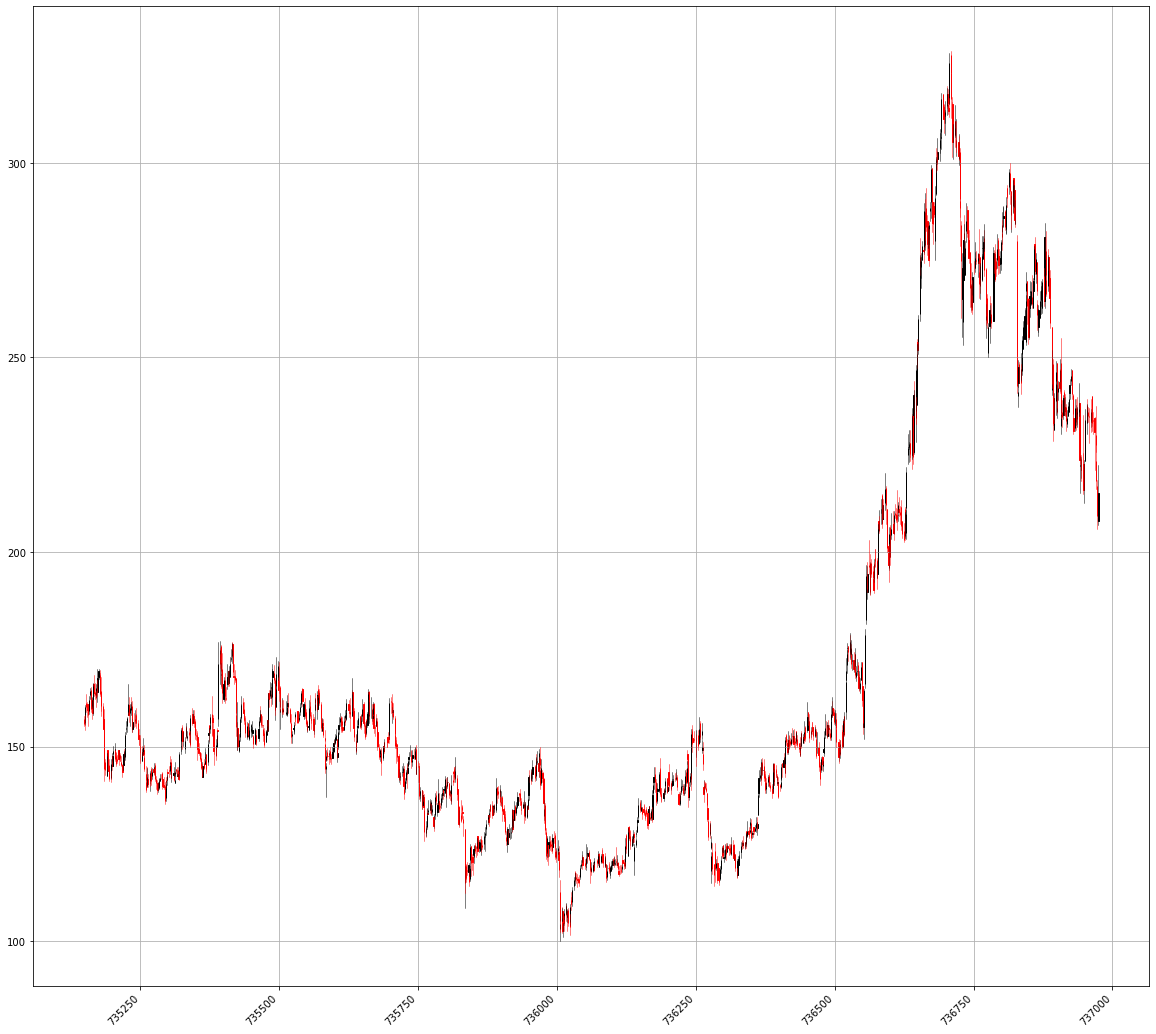

In [14]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
#     Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
#     if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
#         weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
#         ax.xaxis.set_major_locator(mondays)
#         ax.xaxis.set_minor_locator(alldays)
#     else:
#         weekFormatter = DateFormatter('%b %d, %Y')
#     ax.xaxis.set_major_formatter(weekFormatter)
    
#     ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0,1]))
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(mdates.date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
#     ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.savefig('alldataplot.png')
    plt.show()
    
 
pandas_candlestick_ohlc(df)

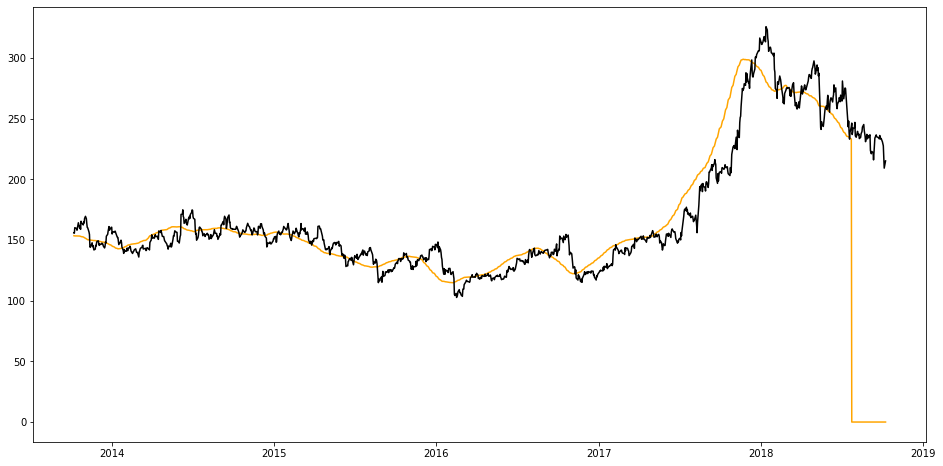

In [229]:
# method 1 : Moving average 

def moving_avg(df,window_size):
    N =len(df)
    std_avg_predictions = []
    for i in range(N):
        std_avg_predictions.append(np.mean(df[i-window_size:i]))
    return np.array(std_avg_predictions)
        
data=df['Close'].to_numpy()

predicted_price=moving_avg(data,50)
# convert Nan to zero
predicted_price[np.isnan(predicted_price)] = 0
df['Prediction']=predicted_price

df.head()
# predicted_price.shape


plt.figure(figsize = (16,8))
plt.plot(df['Prediction'],color='orange')
plt.plot(df['Close'],color='black')
plt.savefig('standard_moving_filter.png')

# The RMSE value is close to 105 but the results are not very promising (as you can gather from the plot).
# The predicted values are of the same range as
# the observed values in the train set (there is an increasing trend initially and then a slow decrease).



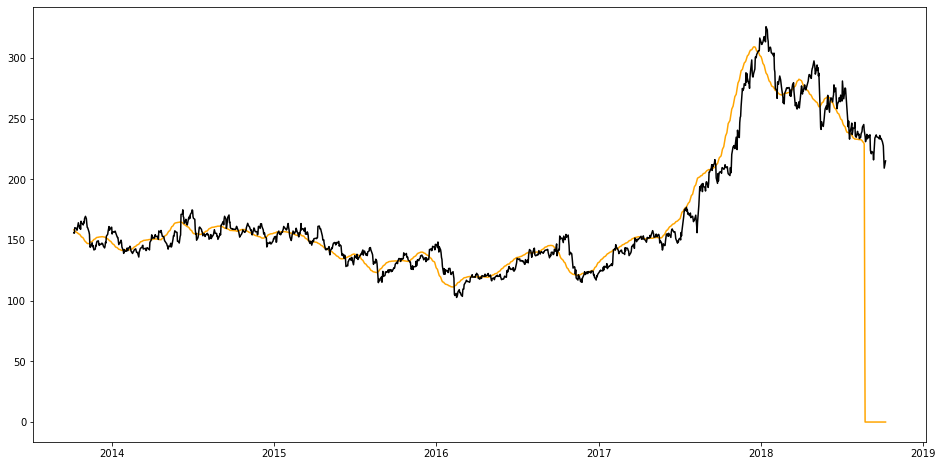

In [231]:
# Exponential Moving Average

def exp_moving_avg(df,window_size):
    decay = 0.5
    running_mean = 0.0
    run_avg_predictions = []
    run_avg_predictions.append(running_mean)
    for i in range(1,N):
        running_mean = running_mean*decay + (1.0-decay)*df[i-1]
        run_avg_predictions.append(running_mean)
        
    return np.array(run_avg_predictions)
        
data=df['Close'].to_numpy()
predicted_price=moving_avg(data,30)
# convert Nan to zero
predicted_price[np.isnan(predicted_price)] = 0
df['Prediction']=predicted_price

# df.head()
plt.figure(figsize = (16,8))
plt.plot(df['Prediction'],color='orange')
plt.plot(df['Close'],color='black')
plt.savefig('exponential_moving_filter.png')

# https://www.datacamp.com/community/tutorials/lstm-python-stock-market


In [242]:
######  LSTM

# https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))

data = new_df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
train = dataset[0:935,:]
valid = dataset[935:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
    
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])


In [243]:
# x=[]
# y=[]
# for i in range(60,len(scaled_data)):
#     x.append(scaled_data[i-60:i,0])
#     y.append(scaled_data[i,0])

# x=np.asarray(x)
# y=np.asarray(y)

# # print(x.shape[0],x.shape[1])
# # print(y.shape[0])
# # reshape 
# # xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1]),1)
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2)


In [244]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

<ipython-input-248-4697af4c18c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


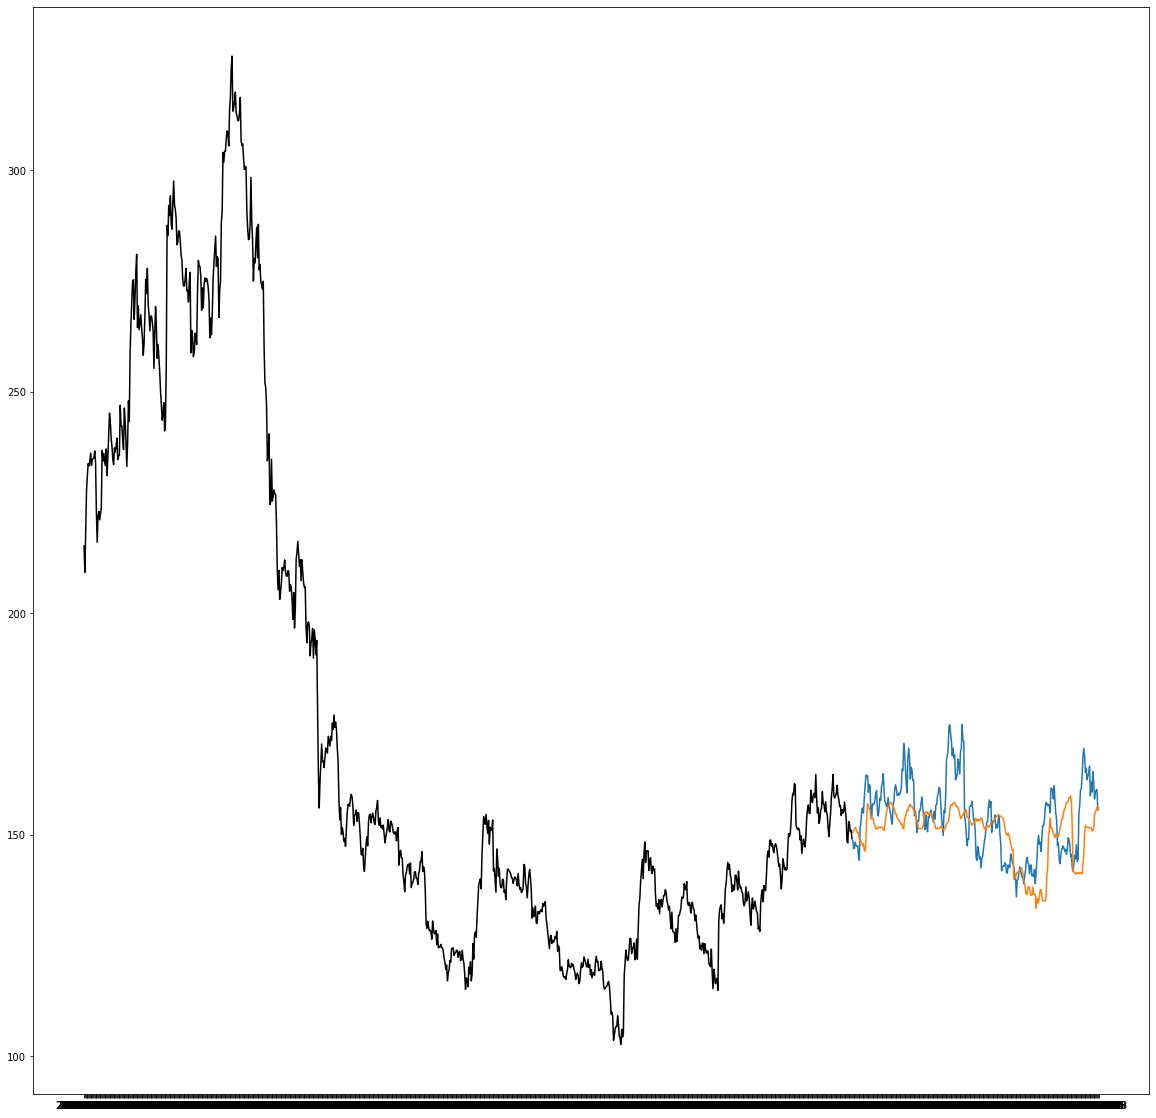

In [248]:
#for plotting
closing_price = model.predict(X_test)
closing_price =np.reshape(closing_price ,(-1,1))
closing_price = scaler.inverse_transform(closing_price)
train = new_data[:935]
valid = new_data[935:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],color='black')
plt.plot(valid[['Close','Predictions']])
plt.savefig('Linear_reg.png')


In [245]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)






GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

<ipython-input-247-4944a837b328>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


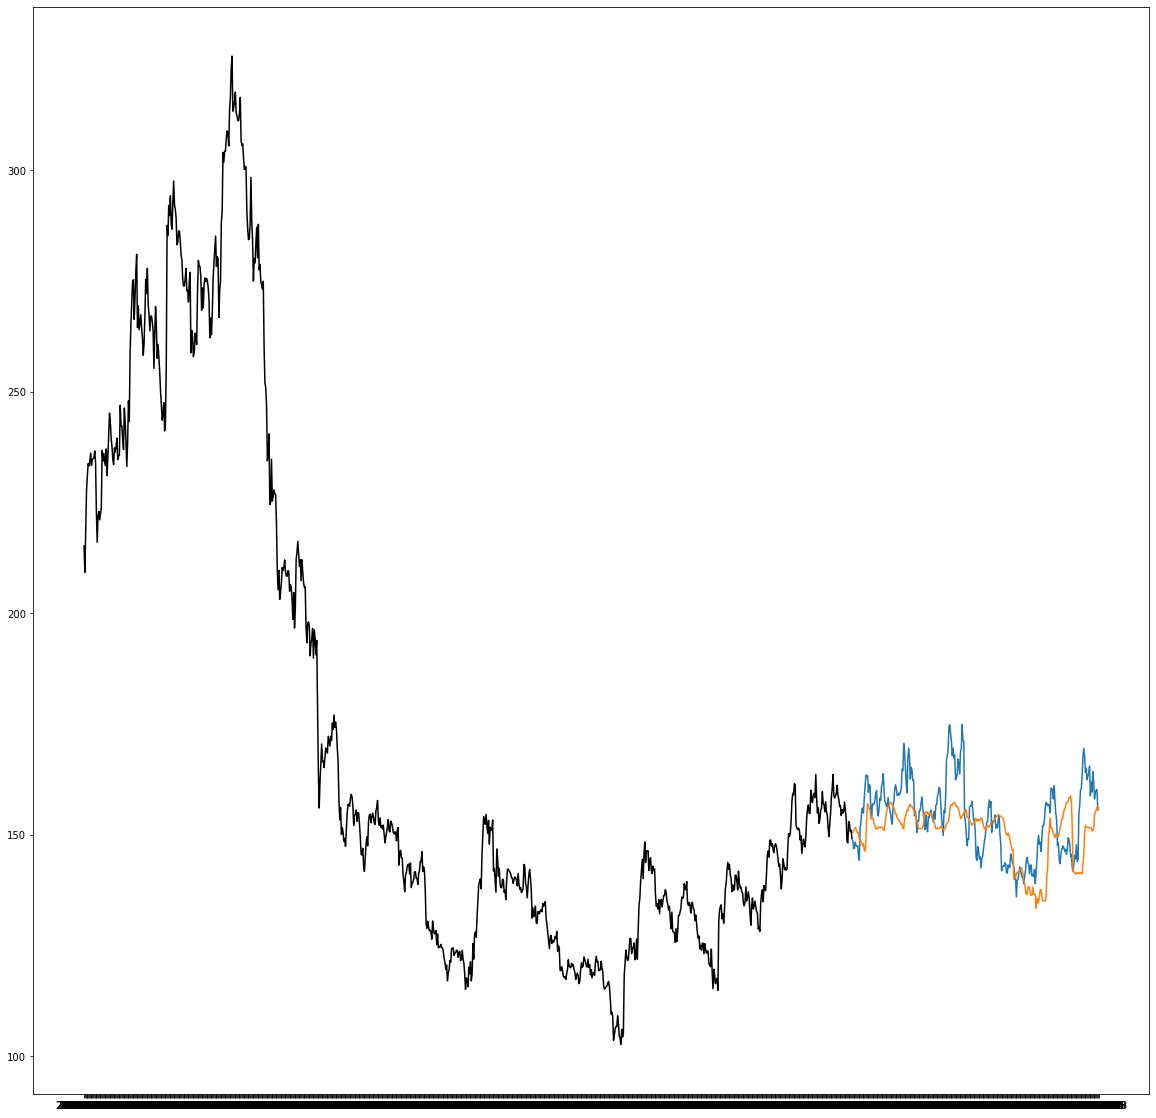

In [247]:
#for plotting
closing_price = model.predict(X_test)
closing_price =np.reshape(closing_price ,(-1,1))
closing_price = scaler.inverse_transform(closing_price)
train = new_data[:935]
valid = new_data[935:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],color='black')
plt.plot(valid[['Close','Predictions']])
plt.savefig('Knn.png')


In [232]:
# prepare the model 
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers import Input ,Activation,concatenate
from keras import optimizers  
from keras.models import Model

model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation="relu",return_sequences=False,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(1))

# print(model.summary())

In [233]:
adam=optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=adam,loss='mse')

#train the model 
# model.fit(xtrain,ytrain,batch_size=50,epochs=100)

In [130]:
ytrain_pred=model.predict(xtrain)
ytrain_pred=scalar.inverse_transform(ytrain_pred)
# ytrain_pred
ytest_pred=model.predict(xtest)
ytest_pred=scalar.inverse_transform(ytest_pred)

In [217]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd

#creating dataframe
new_df=pd.read_csv(r'/home/ashlee/jupyter_notebook/stock_data.csv')
data = new_df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
train = dataset[0:935,:]
valid = dataset[935:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
    
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [218]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


875/875 - 21s - loss: 0.0034


In [219]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [220]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


<ipython-input-226-476bf1ced7da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


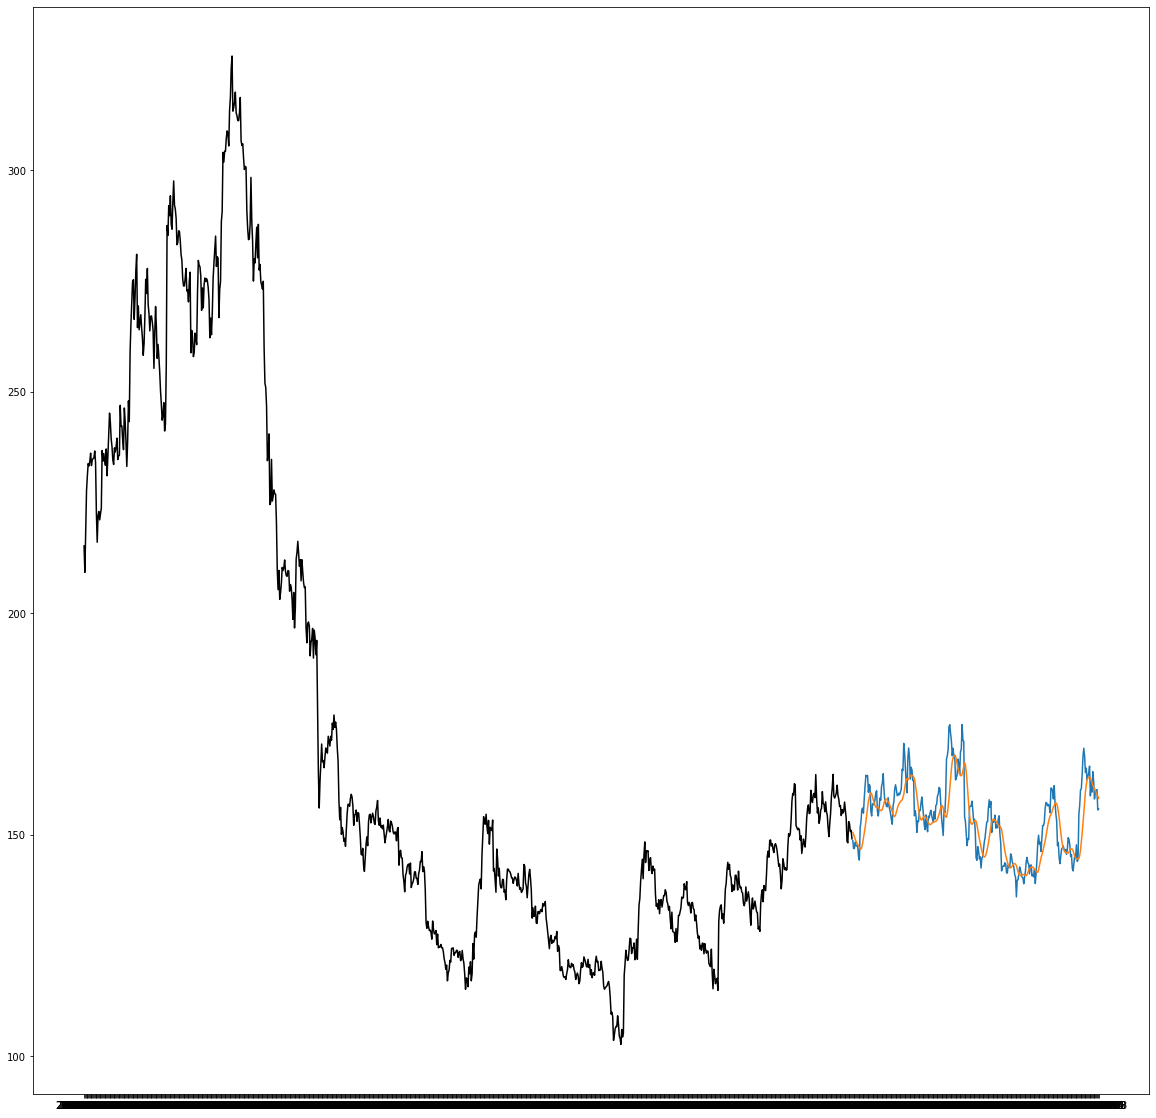

In [226]:
#for plotting
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
train = new_data[:935]
valid = new_data[935:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],color='black')
plt.plot(valid[['Close','Predictions']])
plt.savefig('LSTM.png')